# IoT & Smart Analytics
## A Program by IIIT-H and TalentSprint

## Learning Objectives



At the end of the experiment, you will be able to:

* Understand and implement SVM Linear Classifier for the given dataset
* Separate the data in a linear manner 




## Dataset



### Description

In this experiment, we will use  make_blobs from sklearn. 

The make_blobs() function can be used to generate blobs of points with a Gaussian distribution. It is suitable for linear classification.


This function contains parameters like n_samples, center,  random_state, cluster_std.

## AI/ML Technique



### SVM

In this experiment, we are using SVM.  

* SVM assumes that the data is linearly separable.

* It chooses the line which is more distant from both the classes.

In the SVM algorithm, we find the points closest to the line from both the classes. These points are called support vectors. We compute the distance between the line and the support vectors which is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is called the optimal hyperplane.

![]( https://cdn.extras.talentsprint.com/IOT/Images/SVM_Linear_Hyperplane.png)




### In this experiment we will follow the below steps:





1. Generate the dataset 

2. Randomly choose an intercept and slope (m,c). Then attempt to draw a straight line which separates the two sets of data

3. Maximize the Margin

4. Try to fit the model

 
 5. Visualize the decision boundaries
 
 
 6. We will learn Support vectors
    


## Keywords




Support Vectors 

Maximized Margin 

Optimal hyperplane



##### Importing required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

#### 1. Generating the dataset 

Considering the simple case of a classification task, in which the two classes are well separated.

In [ ]:
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)

In [ ]:
# Checking the length of X, y
X.shape , y.shape

((50, 2), (50,))

In [ ]:
X

In [ ]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

To get a sense of the data, let us visualize the data


In [ ]:
data=pd.DataFrame(np.hstack((X,y[:,np.newaxis])),columns=['F1','F2','Label'])
data.head()

,F1,F2,Label
0,1.412816,1.530335,1.0
1,1.813361,1.631131,1.0
2,1.432893,4.376792,0.0
3,1.872718,4.180692,0.0
4,2.095178,1.079147,1.0


In [ ]:
X.shape

(50, 2)

In [ ]:
X[:3,:]

array([[1.41281595, 1.5303347 ],
       [1.81336135, 1.6311307 ],
       [1.43289271, 4.37679234]])

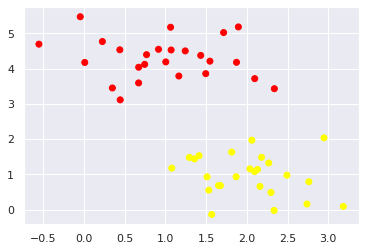

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

#### 2. Randomly choose m and c and plot the lines
* m, c in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)

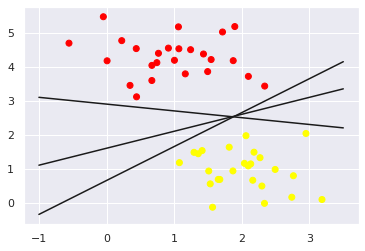

In [ ]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')
for m,c in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit,m*xfit+c,'k-')

These are three different separators which discriminate between these samples. 

**Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper?**

#### 3.  Maximizing the Margin

Support vector machines offer one way to improve on this. 

The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

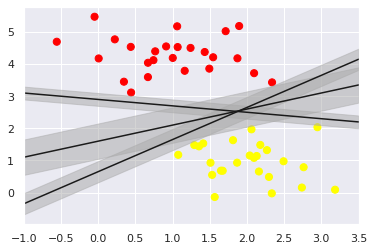

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, c, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + c
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.5)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is  the optimal model. Support vector machines are an example of such a maximum margin estimator.

#### 4. Trying to fit the model

We will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the Regularization(C) parameter to a very large number.

In [ ]:
svm_clf = SVC(kernel='linear', C=0.1)  # Try by changing the value of C. Decrease it less than 1
svm_clf.fit(X, y)
svm_clf.predict(X)
## Hard margin classifier --> Clearly seperable data set --> we use high value of C
## Soft margin classifier --> Mixed, Not clearly seperatble --> low value of c

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [ ]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

#### 5. Visualizing the decision boundaries
* Understanding Coefficient & Intercept of decision boundary and Support vectors which will be used for plotting.

In [ ]:
svm_clf.coef_ # ax+by+c=0

array([[ 0.23525694, -1.41250783]])

In [ ]:
w=svm_clf.coef_[0]
print(w)
print(w[0])
print(w[1])

[ 0.23525694 -1.41250783]
0.23525693639787337
-1.4125078273745393


In [ ]:
svm_clf.intercept_

array([3.29634152])

In [ ]:
c=svm_clf.intercept_[0]
c

3.2963415168371806

In [ ]:
svs=svm_clf.support_vectors_
svs

array([[1.4949318 , 3.85848832],
       [0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.09680487, 3.7174206 ],
       [0.3471383 , 3.45177657],
       [1.41281595, 1.5303347 ],
       [1.81336135, 1.6311307 ],
       [2.06156753, 1.96918596],
       [1.29297652, 1.47930168],
       [2.94821884, 2.03519717]])

In [ ]:
svs[0,:]

array([0.44359863, 3.11530945])

In [ ]:
print(svs[:,0])


[0.44359863 2.33812285 2.06156753]


In [ ]:
print(svs[:,1])

[3.11530945 3.43116792 1.96918596]


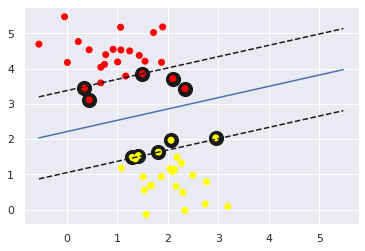

In [ ]:
### Decision boundary plotting
w=svm_clf.coef_[0]
c=svm_clf.intercept_[0]
x_min=np.min(X)
x_max=np.max(X)
# At decision boundary,W0*X0+W1+X1+C=0
# X1=(-W0/W1)*X0-C/W1
X0=np.linspace(x_min,x_max,200)
decision_boundary=(-w[0]/w[1])*X0-c/w[1]
plt.plot(X0,decision_boundary)
### Margin plotting
gutter_up= decision_boundary+ 1/w[1]
gutter_down= decision_boundary - 1/w[1]
plt.plot(X0,gutter_up,'k--')
plt.plot(X0,gutter_down,'k--')
### Support vector plotting
svs=svm_clf.support_vectors_
plt.scatter(svs[:,0],svs[:,1],c='k',s=200)
#### Original data set plotting
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin. 
These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. 

In Scikit-Learn, these points are stored in the support_vectors_ attribute of the classifier: